# Workflow for Class Cell_Data

by Pu Zheng

2018.10.11

## 0.imports

In [1]:
%run "C:\Users\Pu Zheng\Documents\Startup_py3.py"
sys.path.append(r"C:\Users\Pu Zheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import get_img_info, visual_tools, corrections

### 0.1 old info imports, just for checking purposes

In [2]:
# master folder for this dataset:
master_folder = r'Z:/20180911-IMR90_whole-chr21'
# get Folders, Field-of-views
folders, fovs = ia.get_img_info.get_folders(master_folder, feature='H', verbose=True)
# analysis
analysis_folder=master_folder+os.sep+'Analysis'

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 127
- Number of field of views: 65


## 1. Create Cell_Data item

In [3]:
reload(ia.get_img_info)
reload(ia.analysis)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)

<module 'ImageAnalysis3.classes' from 'C:\\Users\\Pu Zheng\\Documents\\ImageAnalysis3\\classes.py'>

### 1.0 create cell_data class and load basic info

In [4]:
# specify initialization parameters:
param = {'data_folder':'Z:/20180911-IMR90_whole-chr21',
         'fov_id': 55,
         'cell_id': 22,
         'temp_folder': r'G:\Temp',
         'save_folder':r'Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu',
         'map_folder':r'Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\distmap',
         'correction_folder':r'Z:\20180911-IMR90_whole-chr21\Analysis\Corrections',
         };
# initialize cell_data class:
a = ia.classes.Cell_Data(param)

# load color_usage
a._load_color_info();
# load encoding_scheme
a._load_encoding_scheme();

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 127
- Number of field of views: 65
- Importing csv file: Z:/20180911-IMR90_whole-chr21\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
-- 127 folders are found according to color-usage annotation.
- Importing csv file: Z:/20180911-IMR90_whole-chr21\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- Importing csv file: Z:/20180911-IMR90_whole-chr21\Analysis\Encoding_Scheme.csv
-- hyb per group: 5
-- region per group: 10
-- colors: ['750', '647', '561']
-- number of groups: [22, 22, 22]


### 1.1 Load more info for cell

In [5]:
# load existing cell_info, dont run for the first time
a._load_from_file('cell_info')
# load segmentation
a._load_segmentation(_denoise_window=0);
# load drift info
drift = a._load_drift(_size=650, _dynamic=True)


- drift already exists for cell:22, skip


### 1.2 Load and crop images from raw data

In [ ]:
# load cropped unique images:
#unique_ims, unique_ids, unique_channels = a._load_images('unique', _verbose=True, _save=True)

# load cropped combo images:
combo_groups = a._crop_images('combo', _verbose=True)

### 1.3 Save to file 

In [974]:
#a._save_to_file('all') # save all

a._save_to_file('cell_info') # save all cell_info exclude images
#a._save_to_file('cell_info', _save_dic={'distance_zxy':a.distance_zxy}) # save specifically this variable

#a._save_to_file('unique') # save unique info into unique_rounds.npz

#a._save_to_file('combo') # save combo_groups into Harry's format

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
-- information updated in cell_info.pkl: ['distance_reference']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl


### 1.4 Directly load from files

In [6]:
# unique
#a._load_from_file('unique', _overwrite=False)
# combo
a._load_from_file('combo', _overwrite=False)
# similar examples for combo and all

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-11\cell-10\group-0\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-11\cell-10\group-0\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-11\cell-10\group-0\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-11\cell-10\group-1\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-11\cell-10\group-1\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-11\cell-10\group-1\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-11\cell-10\group-2\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-11\cell-10\group-2\channel-647\rounds.npz
-- loading combo

## 2. Generate and Pick chromosome

### 2.1 generate and identify chromosome

In [ ]:
# generate
a._generate_chromosome_image('combo')
# identify
a._identify_chromosomes();
# manually pick for only this cell
a._pick_chromosome_manual()

# then do manual picking and close the matplotlib notebook inferface.

### 2.2 Update chromosome coordinate info

In [34]:
a._update_chromosome_from_file();

-- 2 loaded


## 3. Fitting and picking spots for decoded images

### 3.1 Load decoded images

In [33]:
a._load_from_file('decoded', _decoded_flag='diff')
print(len(a.decoded_ids))

-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\group-0\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\group-0\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\group-0\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\group-1\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\group-1\channel-647\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\group-1\channel-561\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\group-2\channel-750\rounds.npz
-- loading combo from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\group-2\channel-647\rounds.npz
-- loading combo from file: Z:\2

--- decoded result matched for group:0, color:647
--- kept ids: [6, 42, 83, 141, 201, 234, 274, 310, 413, 509]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\group-0\channel-561\diff\regions.npz
--- decoded result matched for group:0, color:561
--- kept ids: [4, 43, 84, 139, 202, 235, 275, 308, 414, 510]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\group-1\channel-750\diff\regions.npz
--- decoded result matched for group:1, color:750
--- kept ids: [8, 47, 85, 143, 206, 255, 279, 312, 415, 511]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\group-1\channel-647\diff\regions.npz
--- decoded result matched for group:1, color:647
--- kept ids: [9, 45, 86, 144, 204, 277, 313, 416, 488, 512]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\group-1\channel-561\diff\regions.npz
--- decoded 

--- decoded result matched for group:11, color:647
--- kept ids: [75, 116, 174, 265, 343, 356, 434, 533, 547, 587]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\group-11\channel-561\diff\regions.npz
--- decoded result matched for group:11, color:561
--- kept ids: [117, 172, 226, 332, 354, 397, 481, 534, 585, 602]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\group-12\channel-750\diff\regions.npz
--- decoded result matched for group:12, color:750
--- kept ids: [35, 74, 118, 176, 245, 333, 549, 561, 606, 627]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\group-12\channel-647\diff\regions.npz
--- decoded result matched for group:12, color:647
--- kept ids: [33, 119, 177, 246, 292, 331, 380, 453, 480, 500]
-- loading decoded result from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\group-12\channel-561\diff\regi

### 3.2 multi-fitting

In [34]:
cand_spots = a._multi_fitting(_type='decoded', _num_threads=6, _max_seed_count=6, _min_seed_count=3, _th_to_end=1e-7, _save=True)
#cand_spots = a._multi_fitting(_type='unique', _max_seed_count=6, _min_seed_count=3, _th_to_end=1e-6)

+ Start multi-fitting for decoded images
++ start fitting decoded for fov:5, cell:0 with 6 threads
++ total time in fitting decoded: 823.7691106796265
- Save cell_info to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\cell_info.pkl
-- loading existing info from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['encoding_colors', 'encoding_group_nums', 'hyb_per_group', 'reg_per_group', 'decoded_spots']
- Writing cell data to file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\cell_info.pkl


### 3.3 picking spots by intensity

In [35]:
naive_picked_pts = a._naive_picking_spots('decoded', _save=False)

+ Pick decoded spots for by brightness in fov:5, cell:0


#### 3.2.1 distance map for one chromosome

In [36]:
import matplotlib
from scipy.spatial.distance import pdist,squareform

chrom_id = 0;
print(f"chromosome id:{chrom_id}, coordinate:{a.chrom_coords[chrom_id]}");
# extract coordinates
coords_in_pxl = np.stack([s[1:4] for s in naive_picked_pts[chrom_id]]) # extract only coordnates 
# convert to nm
coords_in_nm = coords_in_pxl * a.distance_zxy
# calculate distance map
distmap = squareform(pdist(coords_in_nm))

chromosome id:0, coordinate:[ 13.72337963  84.79918981 110.20804398]


<IPython.core.display.Javascript object>


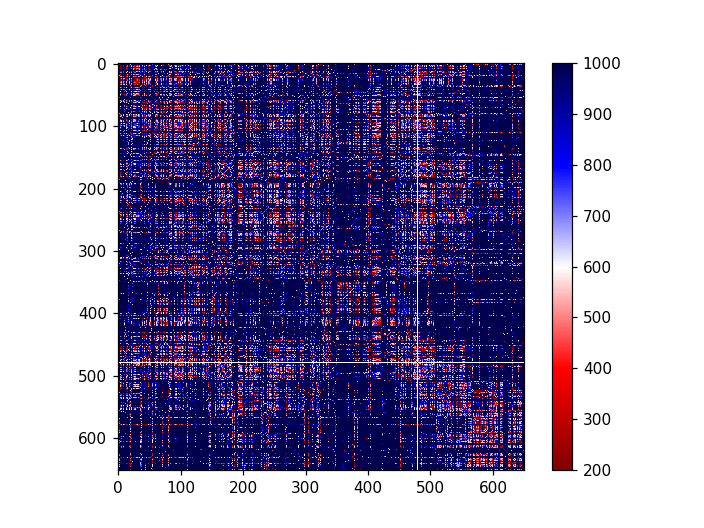

In [37]:
plt.figure()
plt.imshow(distmap, interpolation='nearest', cmap=matplotlib.cm.seismic_r, vmin=200, vmax=1000)
plt.colorbar()

### 3.4 dynamic picking spots

In [46]:
dynamic_picked_pts = a._dynamic_picking_spots('decoded', _w_dist=2)

+ Pick decoded spots for by brightness in fov:5, cell:0
- Save cell_info to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\cell_info.pkl
-- loading existing info from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_decoded_spots']
- Writing cell data to file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\cell_info.pkl


++ generate decoded dist-map for fov:5, cell:0, chrom:0


<IPython.core.display.Javascript object>


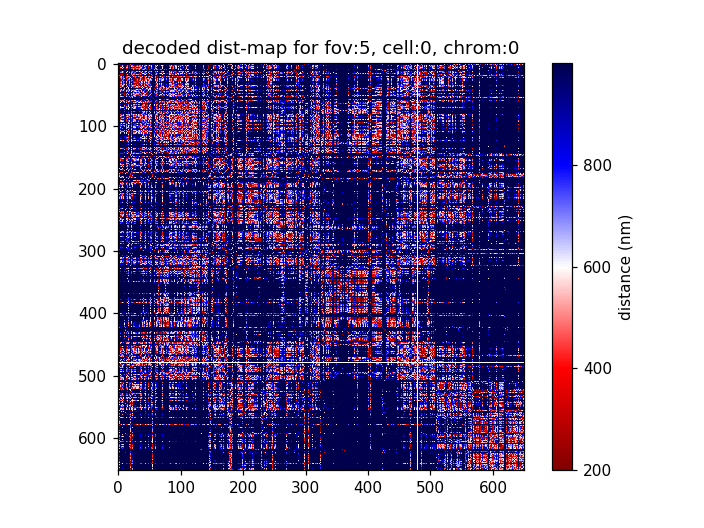

++ generate decoded dist-map for fov:5, cell:0, chrom:1


<IPython.core.display.Javascript object>


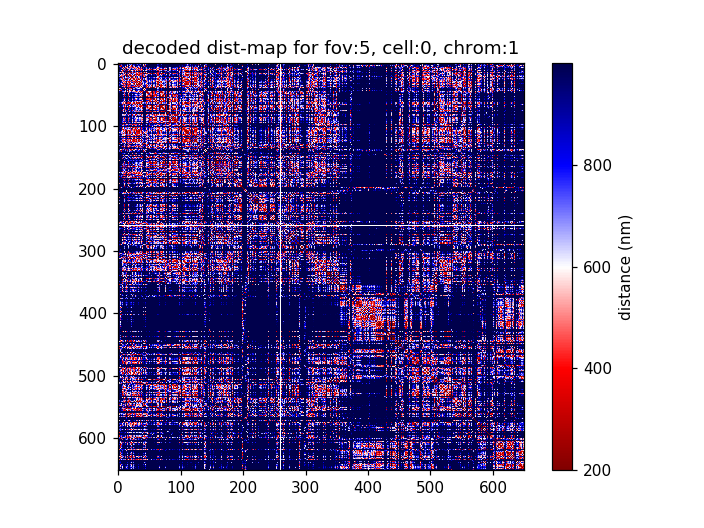

- Save cell_info to: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\cell_info.pkl
-- loading existing info from file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['decoded_distance_map']
- Writing cell data to file: Z:\20180911-IMR90_whole-chr21\Analysis\dense-gpu\fov-5\cell-0\cell_info.pkl


In [47]:
distmaps = a._generate_distance_map('decoded',_limits=[200,1000])

## 4. Fitting and picking spots for unique images

### 4.1 Load decoded images

included in previous loading process

### 4.2 multi-fitting

In [18]:
cand_spots = a._multi_fitting(_type='unique', _max_seed_count=6, _min_seed_count=3, _th_to_end=1e-6)

+ Start multi-fitting for unique images
++ start fitting unique for fov:0, cell:0 with 5 threads
++ total time in fitting: 3344.830055952072
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_spots', 'unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl


### 4.3 picking spots by intensity

In [20]:
naive_picked_pts = a._naive_picking_spots('unique', _save=False)

+ Pick unique spots for by brightness in fov:0, cell:0


#### 4.2.1 distance map for one chromosome

In [21]:
import matplotlib
from scipy.spatial.distance import pdist,squareform

chrom_id = 0;
print(f"chromosome id:{chrom_id}, coordinate:{a.chrom_coords[chrom_id]}");
# extract coordinates
coords_in_pxl = np.stack([s[1:4] for s in naive_picked_pts[chrom_id]]) # extract only coordnates 
# convert to nm
coords_in_nm = coords_in_pxl * a.distance_zxy
# calculate distance map
distmap = squareform(pdist(coords_in_nm))

chromosome id:0, coordinate:[ 18.40221015  78.27206554 103.93315194]


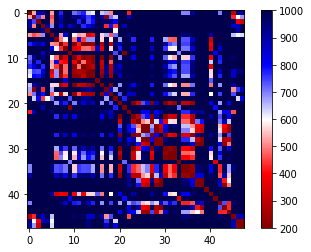

In [22]:
plt.figure()
plt.imshow(distmap, interpolation='nearest', cmap=matplotlib.cm.seismic_r, vmin=200, vmax=1000)
plt.colorbar()

### 4.4 dynamic picking spots

In [23]:
dynamic_picked_pts = a._dynamic_picking_spots('unique', _w_dist=1)

+ Pick unique spots for by brightness in fov:0, cell:0
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots', 'picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl


++ generate unique dist-map for fov:0, cell:0, chrom:0
++ Make directory: Z:/20180911-IMR90_whole-chr21\Analysis\distmap\Conv_zscan_00


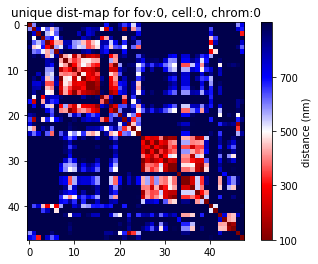

++ generate unique dist-map for fov:0, cell:0, chrom:1


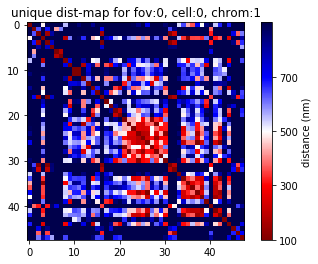

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map', 'unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-0\cell-0\cell_info.pkl


In [24]:
distmaps = a._generate_distance_map('unique',_limits=[100,900])